# Milan Kovacs
## 21308128

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [2]:
data_frame = pd.read_csv("./loans_train_prepared.csv")
data = np.array(data_frame.values, dtype=float)
print("(no. of examples, no. of attributes): ", data.shape)

(no. of examples, no. of attributes):  (614, 17)


# 2) Rescale the dataset

In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

In [37]:
colours = np.array(['r', 'b', 'g', 'y', 'c', 'm', 'lime', 'orange', 'pink', 'purple', 
                    'brown', 'gray', 'navy', 'gold', 'teal', 'indigo', 'violet'])

def clustering_scatter_plot(points, labels, centres, title):
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(
            points[labels==i, 0],
            points[labels==i, 1],
            c=colours[i%colours.size],
            label = f'Cluster {i}'
        )
        
    if centres is not None:
        plt.scatter(centres[:,0], centres[:,1], c='r', marker='*', s=500)
        
    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

# 4) Apply K-Means clustering

In [11]:
k = 5

clustered_data_skibidi_learn = cluster.KMeans(n_clusters=k, 
                                              n_init=10,
                                              max_iter=300).fit(data)

C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [12]:
data_and_centres = np.r_[data,clustered_data_skibidi_learn.cluster_centers_]


In [13]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centres)
print("Optimus Prime Transformation complete")

Optimus Prime Transformation complete


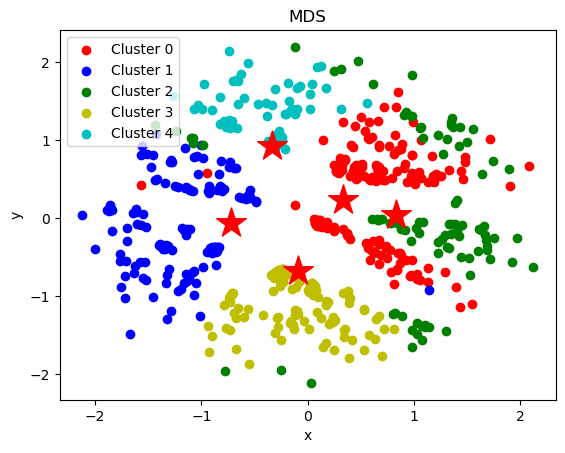

In [14]:
clustering_scatter_plot(
    points=XYcoordinates[:-k,:],
    labels=clustered_data_skibidi_learn.labels_,
    centres=XYcoordinates[-k:,:],
    title='MDS'
)

This graph is shit, I'm going to try t-SNE

transformation complete


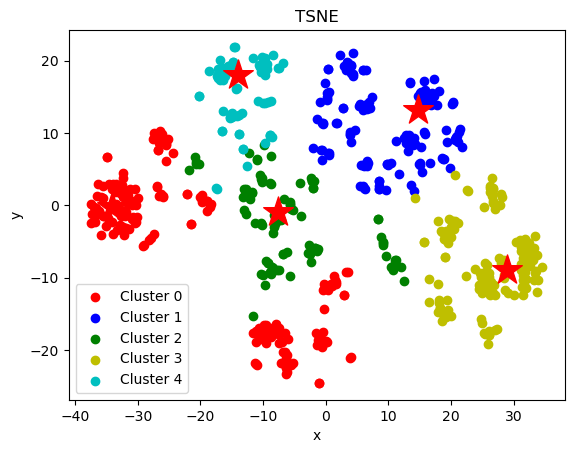

In [17]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centres)
print("transformation complete")

clustering_scatter_plot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_skibidi_learn.labels_,
                       centres=XYcoordinates[-k:,:], 
                       title='TSNE')

# 5) Cluster Analysis

In [18]:
data_frame['cluster'] = pd.Series(clustered_data_skibidi_learn.labels_, index=data_frame.index)

In [19]:
data_frame.head()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0,0.000000,1.082952,1.056390,0.75,1.0,True,False,False,False,False,False,False,False,True,True,0.841086,4
1,1,0.333333,0.924041,1.045549,0.75,1.0,True,False,True,False,False,False,False,False,False,False,0.871711,2
2,2,0.000000,0.681512,0.633249,0.75,1.0,True,False,True,False,True,False,False,False,True,True,0.385189,0
3,3,0.000000,0.606463,1.000974,0.75,1.0,True,False,True,False,False,False,True,False,True,True,0.717012,0
4,4,0.000000,1.100325,1.113997,0.75,1.0,True,False,False,False,False,False,False,False,True,True,0.860305,4


In [20]:
data_frame.tail()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
609,609,0.000000,0.664021,0.673577,0.750,1.0,False,False,False,False,False,False,False,False,False,True,0.364708,1
610,610,1.000000,0.856946,0.392461,0.375,1.0,True,False,True,False,False,False,False,False,False,True,0.587496,0
611,611,0.333333,1.312470,1.565057,0.750,1.0,True,False,True,False,False,False,False,False,True,True,1.116075,0
612,612,0.666667,1.266308,1.324336,0.750,1.0,True,False,True,False,False,False,False,False,True,True,1.042256,0
613,613,0.000000,0.924041,1.072433,0.750,0.0,False,False,False,False,True,False,False,True,False,False,0.663523,1


In [21]:
data_frame.groupby('cluster').mean()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,,
0,312.587571,0.357815,0.944067,1.122174,0.694209,0.994350,0.954802,0.022599,1.000000,0.000000,0.141243,0.067797,0.186441,0.000000,0.598870,0.920904,0.930499
1,324.434783,0.096618,0.919401,1.023792,0.738406,0.905797,0.594203,0.014493,0.000000,0.014493,0.130435,0.065217,0.239130,0.594203,0.000000,0.695652,0.799026
2,305.526316,0.308772,0.890612,1.096892,0.697895,0.315789,0.884211,0.042105,0.884211,0.000000,0.126316,0.021053,0.389474,0.168421,0.284211,0.010526,0.852693
3,297.266667,0.308642,0.920574,1.117656,0.720741,0.985185,0.844444,0.014815,1.000000,0.000000,0.133333,0.029630,0.177778,1.000000,0.000000,0.896296,0.899543
4,274.420290,0.067633,0.850720,0.937543,0.719203,0.884058,0.579710,0.014493,0.028986,0.014493,0.130435,0.072464,0.101449,0.000000,1.000000,0.594203,0.757696


# Elbow 

C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

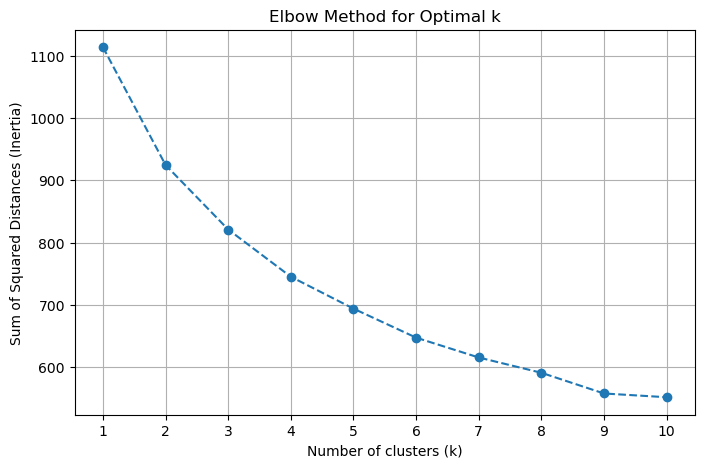

In [54]:
wcss = []  

k_values = range(1, 11)

for k in k_values:
    kmeans = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_) 

plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [55]:
# This suggests the optimal number of clusters is 9

optimal_k = 9


In [56]:
clustered_data_skibidi_learn = cluster.KMeans(n_clusters=optimal_k,
                                              n_init=10,
                                              max_iter=300).fit(data)
data_and_centres = np.r_[data, clustered_data_skibidi_learn.cluster_centers_]

XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centres)
print("Optimus Prime Transformation complete")


C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Optimus Prime Transformation complete


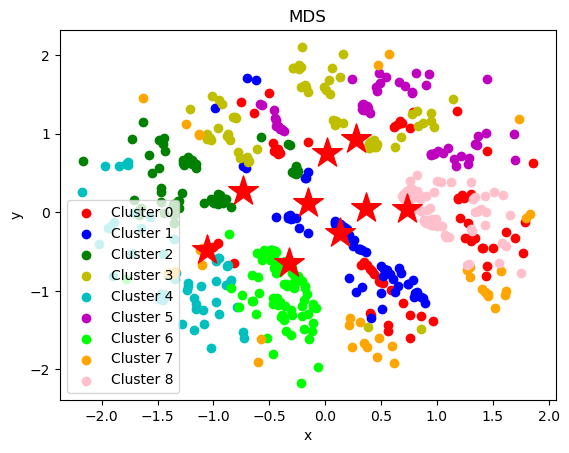

In [57]:
clustering_scatter_plot(
    points=XYcoordinates[:-optimal_k, :],
    labels=clustered_data_skibidi_learn.labels_,
    centres=XYcoordinates[-optimal_k:, :],
    title='MDS'
)

transformation complete


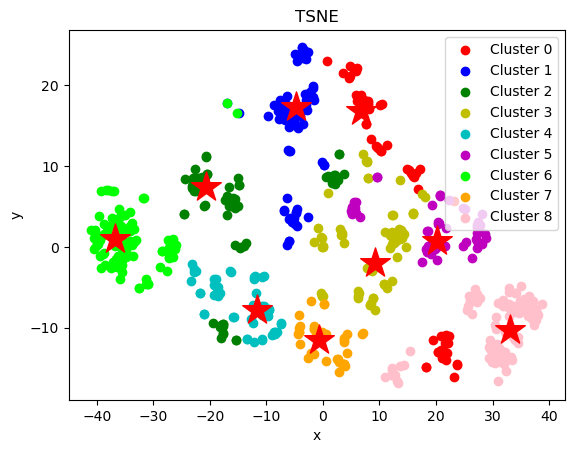

In [58]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centres)
print("transformation complete")

clustering_scatter_plot(points=XYcoordinates[:-optimal_k,:], 
                       labels=clustered_data_skibidi_learn.labels_,
                       centres=XYcoordinates[-optimal_k:,:], 
                       title='TSNE')

# Silhouette
Implement and plot the results of the Silhouette method for determining the best value of k for k-Means. Compare the results of the Elbow method to the results of the Silhouette method.

C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

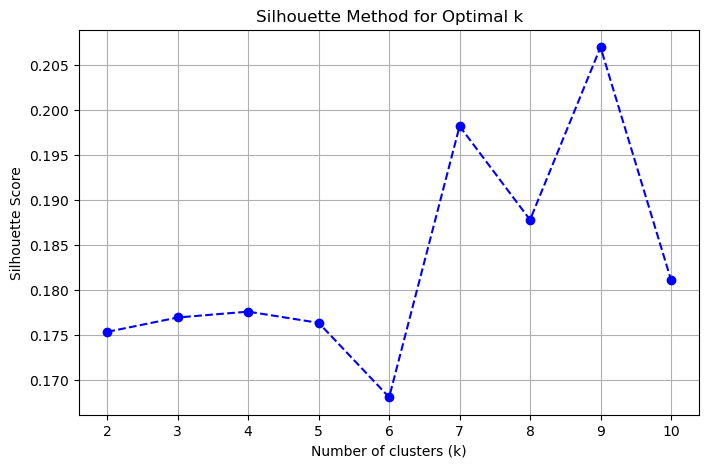

In [52]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 11)  # Start from 2 since silhouette is undefined for k=1

for k in k_values:
    kmeans = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [53]:
optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]  # Pick the k with max silhouette score

print(f"Optimal k from Silhouette Method: {optimal_k_silhouette}")

# Run k-Means with the new k
clustered_data_silhouette = cluster.KMeans(n_clusters=optimal_k_silhouette, 
                                           n_init=10, 
                                           max_iter=300, 
                                           random_state=42).fit(data)

data_frame['silhouette_cluster'] = pd.Series(clustered_data_silhouette.labels_, index=data_frame.index)


Optimal k from Silhouette Method: 9


C:\Users\kmila\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [59]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(data)

# Add results to dataframe
data_frame['dbscan_cluster'] = dbscan_labels

# Print unique clusters found (-1 represents noise)
print(f"Unique clusters found by DBSCAN: {np.unique(dbscan_labels)}")


Unique clusters found by DBSCAN: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]


C:\Users\kmila\AppData\Local\Temp\ipykernel_18464\116865744.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', n_clusters + 1)


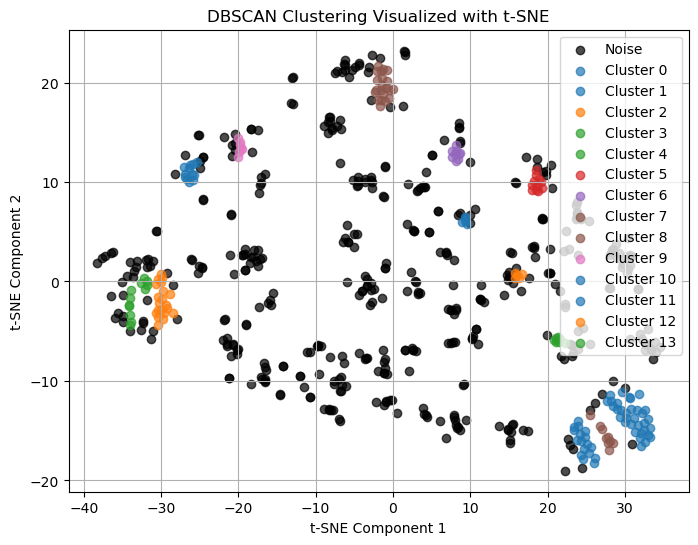

In [60]:
# Reduce dimensions for visualization
XYcoordinates_dbscan = manifold.TSNE(n_components=2, random_state=42).fit_transform(data)

# Plot clusters
plt.figure(figsize=(8,6))
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Ignore noise (-1)
cmap = plt.cm.get_cmap('tab10', n_clusters + 1)

for i in np.unique(dbscan_labels):
    plt.scatter(XYcoordinates_dbscan[dbscan_labels == i, 0], 
                XYcoordinates_dbscan[dbscan_labels == i, 1], 
                label=f'Cluster {i}' if i != -1 else 'Noise', 
                alpha=0.7,
                color=cmap(i % 10) if i != -1 else 'black')

plt.title('DBSCAN Clustering Visualized with t-SNE')
plt.legend()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


In [ ]:
data_frame.groupby('dbscan_cluster').mean()


## Conclusion
I have no idea